I hope you find this kernel useful and your UPVOTES would be highly appreciated

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
import pandas_datareader
import datetime
import pandas_datareader.data as web

In [2]:
start= datetime.datetime(2015,1,1)
end= datetime.datetime.today()

#another way to set up dates:
#start = pd.to_datetime('2015-01-01')
#end = pd.to_datetime('2020-01-01')

In [3]:
aapl = web.DataReader('AAPL', 'yahoo', start, end)
ibm = web.DataReader('IBM', 'yahoo', start, end)
amzn = web.DataReader('AMZN', 'yahoo', start, end)

#Alternative way to download portfolio data:
#aapl = quandl.get('WIKI/AAPL.11',start_date=start,end_date=end)

aapl.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,111.440002,107.349998,111.389999,109.330002,53204600.0,100.216454
2015-01-05,108.650002,105.410004,108.290001,106.250000,64285500.0,97.393181
2015-01-06,107.430000,104.629997,106.540001,106.260002,65797100.0,97.402374
2015-01-07,108.199997,106.699997,107.199997,107.750000,40105900.0,98.768150
2015-01-08,112.150002,108.699997,109.230003,111.889999,59364500.0,102.563072


In [4]:
aapl.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1292 entries, 2015-01-02 to 2020-02-20
Data columns (total 6 columns):
High         1292 non-null float64
Low          1292 non-null float64
Open         1292 non-null float64
Close        1292 non-null float64
Volume       1292 non-null float64
Adj Close    1292 non-null float64
dtypes: float64(6)
memory usage: 70.7 KB


In [5]:
aapl = aapl[['Adj Close']]
ibm = ibm[['Adj Close']]
amzn = amzn[['Adj Close']]

In [6]:
aapl.head()

,Adj Close
Date,
2015-01-02,100.216454
2015-01-05,97.393181
2015-01-06,97.402374
2015-01-07,98.768150
2015-01-08,102.563072


In [7]:
for stock_df in (aapl, ibm, amzn):
    stock_df['Normed Return'] = stock_df['Adj Close']/ stock_df.iloc[0]['Adj Close']

## Allocation: 

20% to Apple, 30% to IBM and 50% to Amazon stocks. And assume that the initial investment was 500,000.

In [8]:
for stock_df, allo in zip((aapl, ibm,amzn),[0.2,0.3,0.5]):
    stock_df['Allocation'] = stock_df['Normed Return']*allo

In [9]:
for stock_df in (aapl, ibm, amzn):
    stock_df['Position Amount']= stock_df['Allocation']*500000

## Portfolio Value:

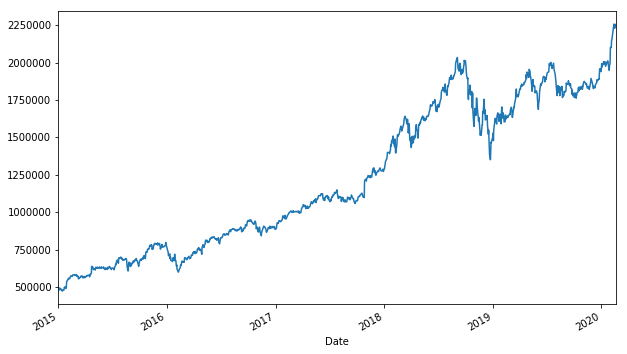

In [10]:
total_pos_vals = [aapl['Position Amount'], ibm['Position Amount'], amzn['Position Amount']]
portf_vals = pd.concat(total_pos_vals, axis = 1)
portf_vals.columns = ['Apple Pos', 'IBM Pos', 'Amazon Pos']
portf_vals['Total Pos'] = portf_vals.sum(axis=1)
portf_vals['Total Pos'].plot(figsize = (10,6))

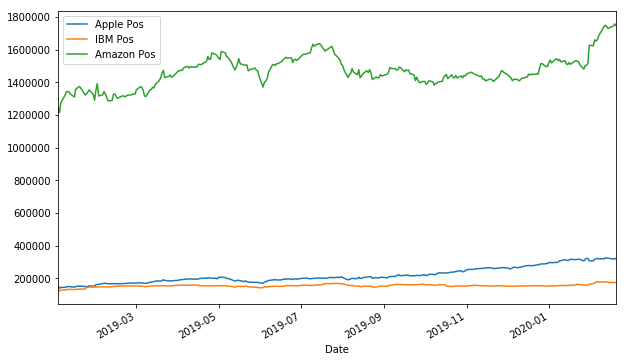

In [11]:
portf_vals['2019-01-01':].drop('Total Pos', axis = 1).plot(figsize=(10,6));

## Portfolio Statistics

In [12]:
portf_vals['Daily Return'] = portf_vals['Total Pos'].pct_change(1)
portf_vals.dropna(inplace = True)
print('Daily Return Average: ',portf_vals['Daily Return'].mean())
print('Daily Return Standard Deviation: ',portf_vals['Daily Return'].std())

Daily Return Average:  0.0012746013787752876
Daily Return Standard Deviation:  0.015025657793843721


To look at the distribution, let's take a look at a histogram and a KDE plot:

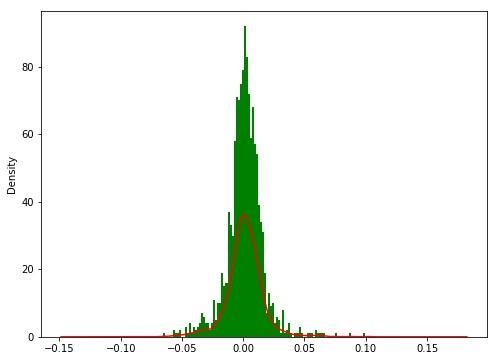

In [13]:
portf_vals['Daily Return'].plot(kind = 'hist', bins=100, figsize = (6,8), color = 'green')
portf_vals['Daily Return'].plot(kind = 'kde', figsize = (8,6), color = 'R');

In [14]:
cumulative_return = 100*(portf_vals['Total Pos'][-1]/portf_vals['Total Pos'][0]-1)
print('Cumulative return: ', cumulative_return)

Cumulative return:  357.39189766958594


## Sharpe Ration

In [15]:
SR = portf_vals['Daily Return'].mean()/portf_vals['Daily Return'].std()
print('Sharpe Ration = ', SR)

Sharpe Ration =  0.0848283247404659


In [16]:
#Annual Sharpe Ratio:
ASR = (252**0.5) * SR
print('Annualized Sharpe Ratio = ', ASR)

Annualized Sharpe Ratio =  1.3466079083850029


Now let's allocate our securities in a most optimal way:

In [17]:
stocks = pd.concat([aapl['Adj Close'], ibm['Adj Close'], amzn['Adj Close']], axis = 1)
stocks.columns = ['Apple', 'IBM', 'Amazon']
stocks.head()

,Apple,IBM,Amazon
Date,,,
2015-01-02,100.216454,129.241516,308.519989
2015-01-05,97.393181,127.207932,302.190002
2015-01-06,97.402374,124.464600,295.290009
2015-01-07,98.768150,123.651100,298.420013
2015-01-08,102.563072,126.338654,300.459991


To calculate Mean Daily Return:

In [18]:
stocks.pct_change(1).mean()

Apple     0.001023
IBM       0.000207
Amazon    0.001673
dtype: float64

To calculate correlation between stocks:

In [19]:
stocks.pct_change(1).corr()

,Apple,IBM,Amazon
Apple,1.000000,0.386721,0.478057
IBM,0.386721,1.000000,0.339162
Amazon,0.478057,0.339162,1.000000


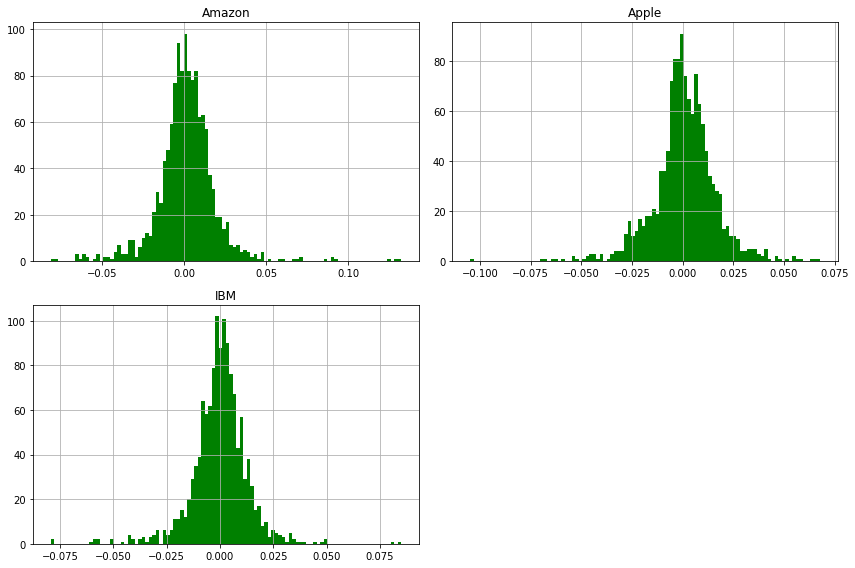

In [20]:
log_returns = np.log(stocks/stocks.shift(1))
log_returns.hist(bins = 100, figsize = (12,8), color = 'g')
plt.tight_layout()

Covarience of the columns:

In [21]:
log_returns.cov()*252

,Apple,IBM,Amazon
Apple,0.062057,0.020057,0.034720
IBM,0.020057,0.043122,0.020604
Amazon,0.034720,0.020604,0.083525


## Sharpe Ration for One Portfolio

In [22]:
np.random.seed(101)
print(stocks.columns)

weights = np.array(np.random.random(3))

print('Random Weights: ')
print(weights)

#However, their sum must be equal to 100
print('Rebalance')
weights = weights/np.sum(weights)
print(weights)

Index(['Apple', 'IBM', 'Amazon'], dtype='object')
Random Weights: 
[0.51639863 0.57066759 0.02847423]
Rebalance
[0.46291341 0.51156154 0.02552505]


Expected Return:

In [23]:
exp_ret = np.sum((log_returns.mean() * weights) * 252)
print('Expected Portfolio Return: ',exp_ret)

Expected Portfolio Return:  0.13035392092465514


Expected Volatility or Expected 

In [24]:
exp_vol = np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 252, weights)))
print('Expected Volatility: ', exp_vol)

Expected Volatility:  0.1884023115551446


The Sharpe Ratio:

In [25]:
SR = exp_ret/exp_vol
print('Sharpe Ratio: ', SR)

Sharpe Ratio:  0.6918913035018738


# Choosing an optimal portfolio allocation.

In [26]:
num_ports = 5000
all_weights = np.zeros((num_ports,len(stocks.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):
    weights = np.array(np.random.random(3))
    weights = weights / np.sum(weights)
    all_weights[ind,:] = weights
    ret_arr[ind] = np.sum((log_returns.mean() * weights) *252)
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 252, weights)))
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]

In [27]:
sharpe_arr.max()

1.3491088568863503

Index location for the best allocation:

In [28]:
sharpe_arr.argmax()

3055

Here is the optimal allocation for our portfolio

In [29]:
all_weights[sharpe_arr.argmax(),:]

array([0.27914055, 0.00240977, 0.71844969])

Let's plot the data:

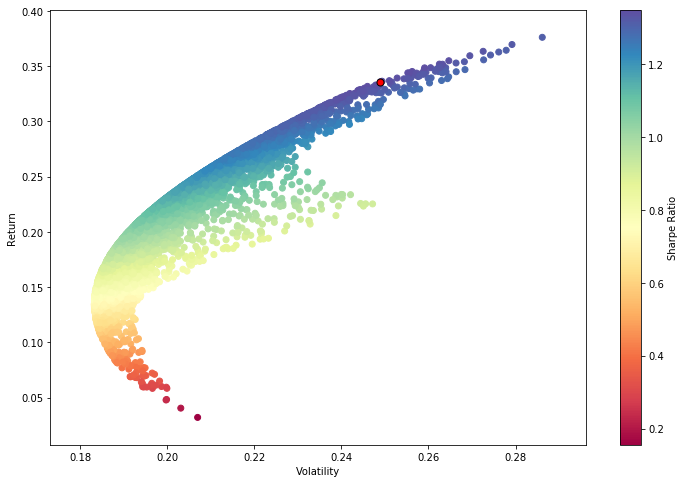

In [30]:
plt.figure(figsize = (12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='Spectral')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# Add red dot for max SR
max_sr_ret = ret_arr[sharpe_arr.argmax()]
max_sr_vol = vol_arr[sharpe_arr.argmax()]
plt.scatter(max_sr_vol,max_sr_ret,c='red',s=50,edgecolors='black');

So our Optimal Sharpe Ration is 1.36 and Optimal Portfolio Allocation is 27.9% for Aplle, 0.2% for IBM, and 71.8% for Amazon. So, I would conclude to substitute IMB shares to something more profitable.